<a href="https://colab.research.google.com/github/shafqatameen/IRIS/blob/main/iris_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Import Libraries

Import necessary libraries for data handling, visualization, and modeling:


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

##2. Load and Explore the Dataset

Load the dataset using pandas:

In [ ]:
df = pd.read_csv('height-weight.csv')
print(df.head())


   Weight  Height
0      45     120
1      58     135
2      48     123
3      60     145
4      70     160


Check the relationship between Weight and Height using a scatter plot:


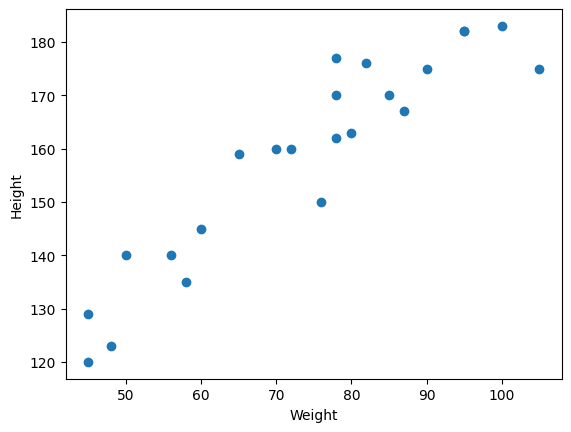

In [ ]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()


Calculate correlation:

In [ ]:
print(df.corr())


          Weight    Height
Weight  1.000000  0.931142
Height  0.931142  1.000000


##3. Data Visualization

Use Seaborn to create a pairplot for better visualization:

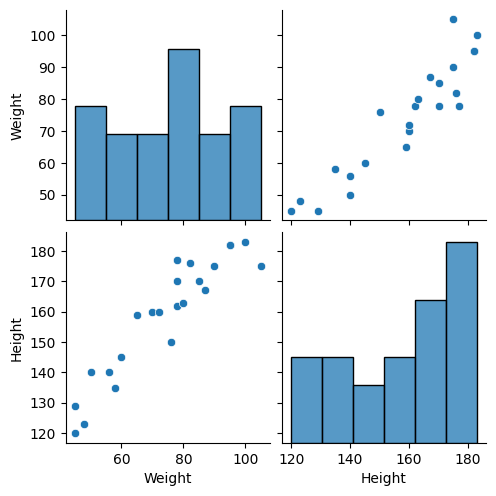

In [ ]:
sns.pairplot(df)
plt.show()


##4. Prepare Features and Target

Separate the independent (X) and dependent (y) variables:


In [ ]:
X = df[['Weight']]  # 2D array
y = df['Height']    # 1D array

Verify the shape of the arrays:


In [ ]:
print(np.array(X).shape)
print(np.array(y).shape)


(23, 1)
(23,)


##5. Train-Test Split


Split the data into training and testing sets:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


##6. Standardization

Scale the features using StandardScaler:

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##7. Apply Linear Regression


Train a Linear Regression model:

In [ ]:
regression = LinearRegression()
regression.fit(X_train, y_train)


LinearRegression()

Print model coefficients and intercept:


In [ ]:
print("Coefficient or slope:", regression.coef_)
print("Intercept:", regression.intercept_)


Coefficient or slope: [17.2982057]
Intercept: 156.47058823529412


##8. Evaluate the Model


Predict on test data:


In [ ]:
y_pred = regression.predict(X_test)


Calculate performance metrics:

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


Print metrics:

In [ ]:
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R^2:", r2)


MSE: 114.84069295228699
MAE: 9.66512588679501
RMSE: 10.716374991212605
R^2: 0.7360826717981276


Compute adjusted R²:

In [ ]:
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R²:", adj_r2)


Adjusted R²: 0.6701033397476595


##9. Plot Best Fit Line (Training Data)

Plot the best-fit line on training data:


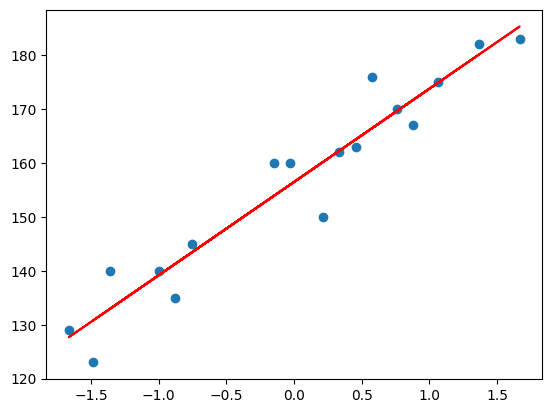

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), color='red')
plt.show()


##10. OLS Regression (Optional)


Use Statsmodels for detailed summary:

In [ ]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sun, 12 Jan 2025   Prob (F-statistic):                       0.664
Time:                        17:39:54   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


##11. Make Predictions for New Data


Predict height for a new weight (e.g., Weight = 72):

In [ ]:
new_prediction = regression.predict(scaler.transform([[72]]))
print(new_prediction)


[155.97744705]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
